## Ejercicio 1: Preparar el ambiente de trabajo
- Importe todas las librerías a utilizar.
- Fije los parámetros de los gráficos con plt.Rcparams .
- Excluya las columnas **id** y **Unnamed: 32** de la base de datos.
- Recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
df_original = pd.read_csv('breast_cancer.csv')
df_original.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
plt.rcParams['figure.figsize'] = (10, 15)

In [4]:
df = df_original.copy(deep = True).drop(columns = ['Unnamed: 32','id'])
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [5]:
# (M = maligno, B = benigno)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
#recodifique el vector objetivo diagnosis a numérico para poder procesarlo posteriormente

df['diagnosis'] = np.where(df['diagnosis']== 'B', 0, 1)
df.diagnosis.value_counts('%')

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

## Ejercicio 2: Visualizando la distribución de los atributos

- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

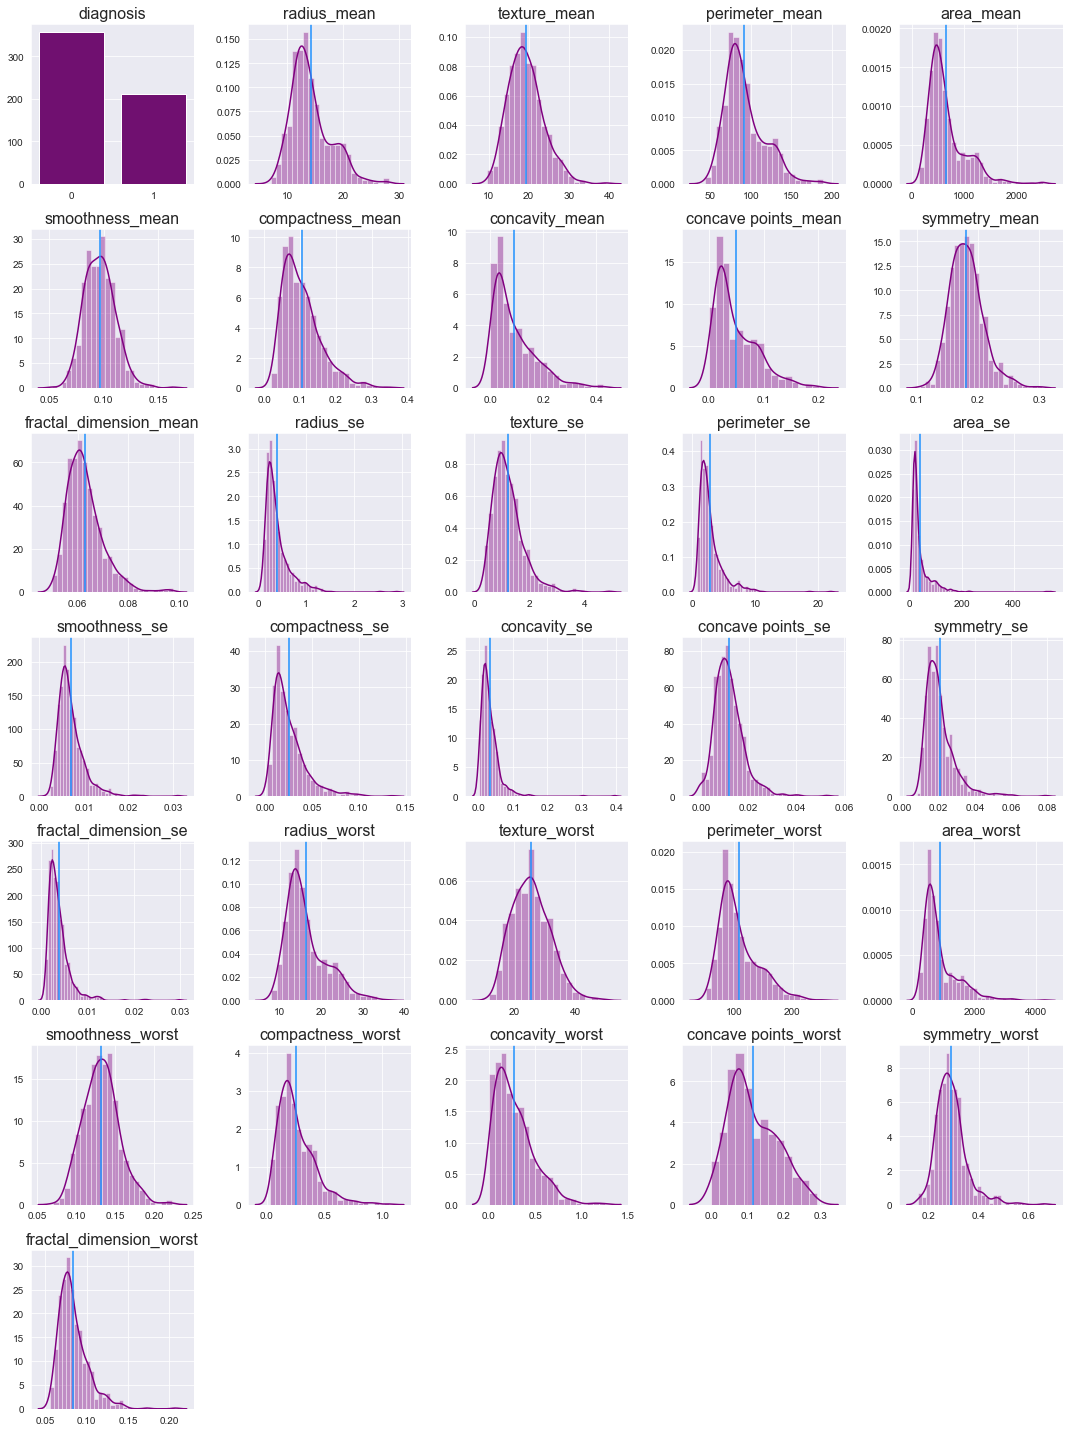

In [7]:
def plot_histogram(df, cols):
    
    plt.figure(figsize=(15,20))
    rows = df.shape[1] / (cols - 1)
    
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        if pd.api.types.is_float_dtype(serie) is True:
            sns.distplot(serie, color='purple')
            plt.axvline(np.mean(serie), color='dodgerblue')
        elif pd.api.types.is_integer_dtype(serie) is True:
            sns.countplot(serie, color='purple')
        plt.title(colname, fontsize=16)
        plt.xlabel('');plt.ylabel('');plt.tight_layout()
        
plot_histogram(df,5)

### Comentarios:
- La mayoria de las personas tiende tener un cancer de tipo benigno. Existen atributos que se comportan con una distribucion normal como **smoothness_worst**,**texture_mean**, **symmetry_mean** y **smoothness_mean**.

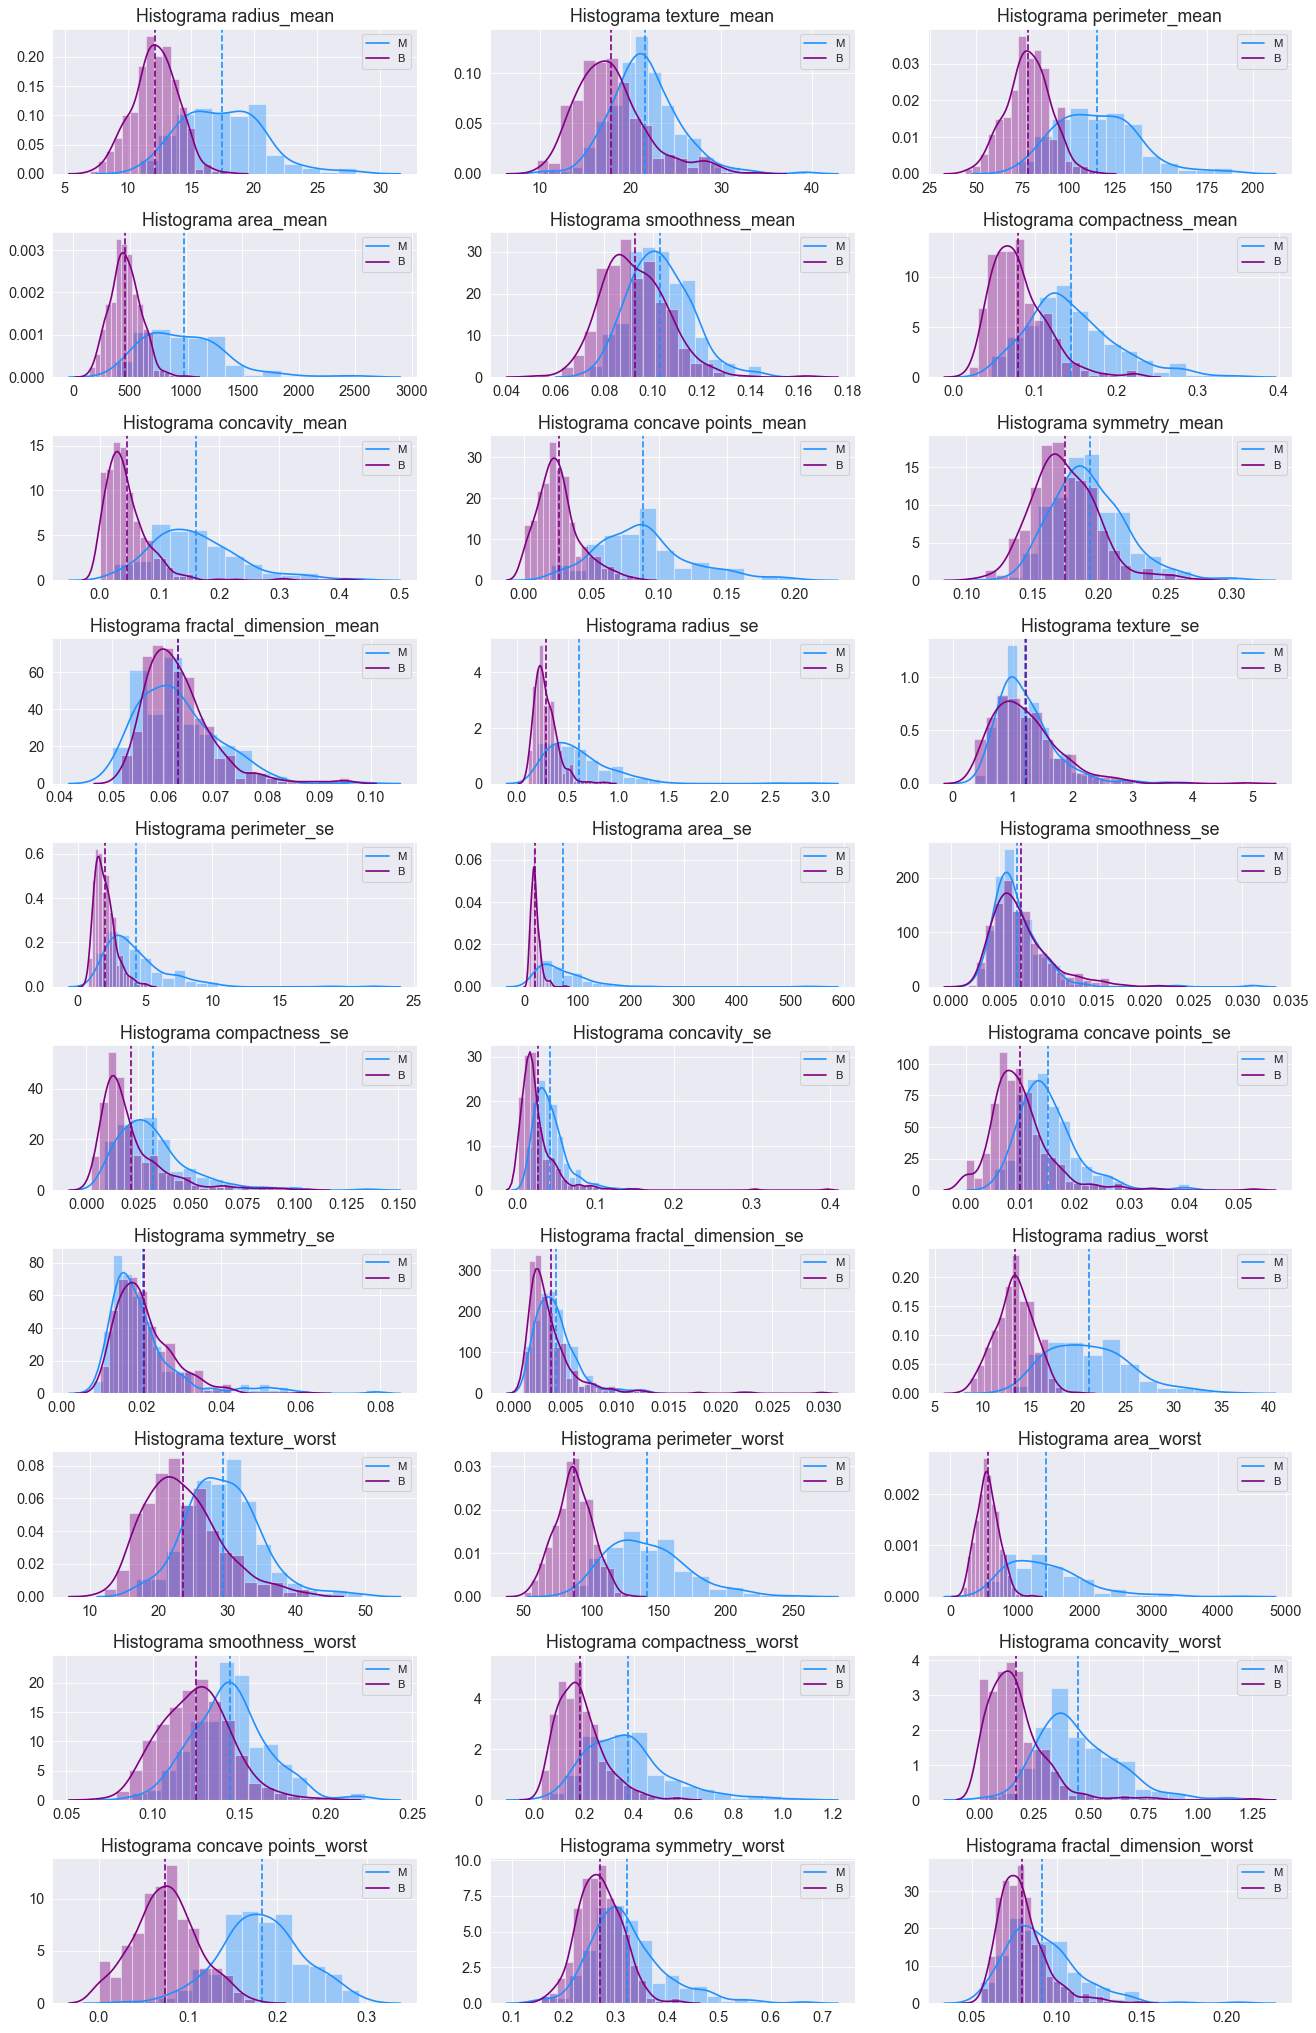

In [8]:
# Análisis de cada variable para cada clsase del vector objetivo
fig = plt.figure(figsize=(20, 100), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
variables = df.loc[:, 'radius_mean':'fractal_dimension_worst'].columns
for index, variable in enumerate(variables):
    ax = fig.add_subplot(len(variables), 3, index + 1)
    sns.distplot(df[df['diagnosis'] == 1][variable],
                 axlabel=False, kde_kws={"label": "M"}, color='dodgerblue')
    mean_m = df[df['diagnosis'] == 1][variable].mean()
    ax.axvline(mean_m, linestyle='--', color='dodgerblue')
    sns.distplot(df[df['diagnosis'] == 0][variable],
                 axlabel=False, kde_kws={"label": "B"}, color='purple')
    mean_b = df[df['diagnosis'] == 0][variable].mean()
    ax.axvline(mean_b, linestyle='--', color='purple')
    ax.set_title('Histograma {}'.format(variable), size=16)

### Comentarios:

Los rasgos que mantienen un similitud en las respectivas clases del vector objetivo son:
- smoothness_mean
- symmetry_mean
- symmetry_se
- concave_points_se
- texture_se
- fractal_dimension_mean
- fratal_dimension_se

## Ejercicio 3: Estimando el porcentaje de overlap en los atributos
- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

In [9]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima),
                                  np.sum(tmp_hist_holder["h_0"]))
    return intersection

- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
- Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.

In [10]:
columnas = []
resultados = []

for index,columna in enumerate(df.columns): 
    if (columna != 'diagnosis'):
        resultado = histogram_overlap(df,columna, 'diagnosis')
        resultados.append(resultado)
        columnas.append(columna)
        
df_final = pd.DataFrame(resultados,columnas)
df_final.columns = ['overlap_perc']
df_final = df_final.sort_values('overlap_perc', ascending=False)
df_final

overlap_perc
fractal_dimension_se         0.593838
smoothness_se                0.591036
fractal_dimension_mean       0.588235
symmetry_se                  0.568627
texture_se                   0.549020
compactness_se               0.523810
smoothness_mean              0.521008
symmetry_mean                0.509804
concave points_se            0.507003
fractal_dimension_worst      0.492997
smoothness_worst             0.453782
concavity_se                 0.450980
symmetry_worst               0.436975
texture_mean                 0.389356
texture_worst                0.380952
compactness_mean             0.316527
compactness_worst            0.316527
perimeter_se                 0.280112
radius_se                    0.277311
concavity_worst              0.212885
area_se                      0.207283
radius_mean                  0.184874
concavity_mean               0.182073
area_mean                    0.179272
perimeter_mean               0.168067
concave points_worst         0.140056
concave points_mean          0.137255
radius_worst                 0.134454
perimeter_worst              0.128852
area_worst                   0.128852

Text(0.5, 1.0, 'Porcentaje de overlap por atributo')

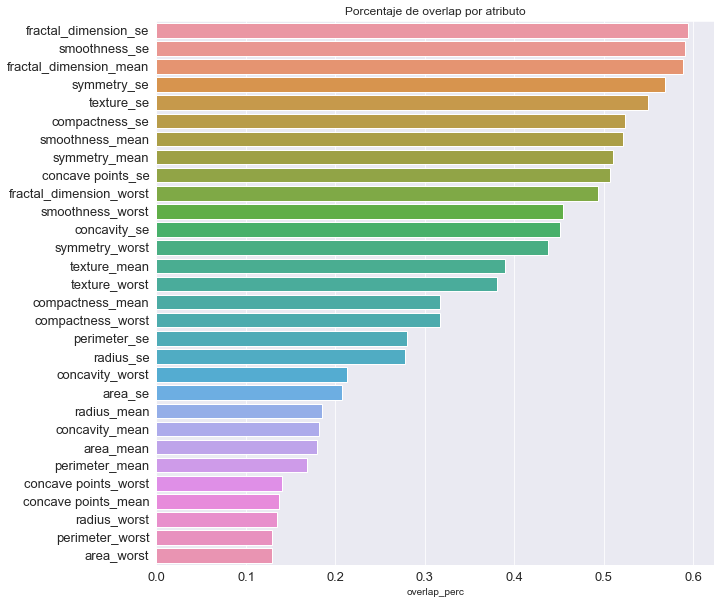

In [11]:
plt.figure(figsize=(10, 10))
barplot_gen = sns.barplot(x=df_final.columns[0],
                          y=df_final.index,
                          data=df_final
                          )
barplot_gen.set_title('Porcentaje de overlap por atributo')

### Comentarios:
- Se puede observar que los atributos con mayor overlap corresponden en general a los atributos con distibuciones más parecidas reportados anteriormente.

## Ejercicio 4: Selección del modelo por GridSearchCV
- Entrene una serie de modelos SVC con los siguientes hiperparámetros: 
    * C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] .
    * gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].
    * Validaciones cruzadas: 10.
- Genere un heatmap en base a los puntajes estimados con GridSearchCV.
- tip: Vea cómo acceder a la llave mean_test_score en el diccionario cv_results_.

In [12]:
# Escalado y división de conjuntos de Train y Test
X_scaled = StandardScaler().fit_transform(df.loc[:, 'radius_mean':'fractal_dimension_worst'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['diagnosis'], random_state=93177, test_size=.33)

In [13]:
# Definición de Hiperparámetros
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [14]:
# generamos un diccionario vacío para guardar la combinación de hiperparámetros y su desempeño asociado
empty_dict = {}
# capturamos el mejor puntaje
best_score = 0
# iniciamos una lista para capturar la iteración del 1er hiperparametro
c_holder = []

# para cada valor en el primer rango
for c in c_param_range:
    # iniciamos una lista para capturar la iteración del 2do parámetro
    gamma_holder = []
    # para cada valor en el segundo rango
    for gamma in gamma_param_range:
        tmp_score = cross_val_score(SVC(C=c, gamma=gamma),
        # validamos de forma cruzada con el conjunto de entrenamiento!
        X_train, y_train, cv=10, n_jobs=-1)
        # generamos una llave col la combinación de parámetros
        # y la lista de desempeño validada de forma cruzada
        empty_dict[str("C: {}, Gamma: {}".format(c, gamma))] = list(tmp_score)
        # Agregamos a cada lista secundaria el promedio de validación cruzada
        gamma_holder.append(np.mean(tmp_score))
        # si la media es mejor que el mejor puntaje registrado
        if np.mean(tmp_score) > best_score:
            best_score = np.mean(tmp_score)
            # extraemos el string asociado a la combinación de valores
            best_params = str("C: {}, Gamma: {}".format(c, gamma))
    # adjuntamos la lista secundaria de cada valor a la primaria.
    c_holder.append(gamma_holder)
# redimensionamos a una matriz
cv_params = np.array(c_holder).reshape(8, 7)

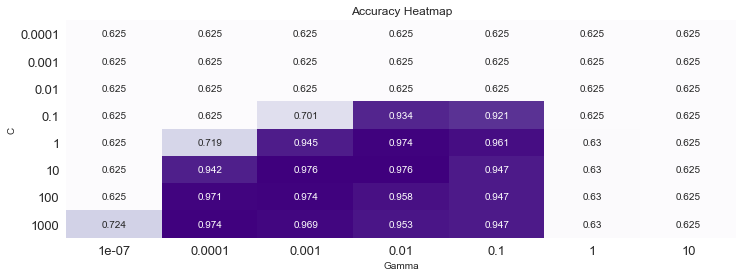

In [15]:
plt.figure(figsize=(12, 4))
grid = GridSpec(1, 2, width_ratios=[2,1])
sns.heatmap(cv_params, annot=True, cmap='Purples', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

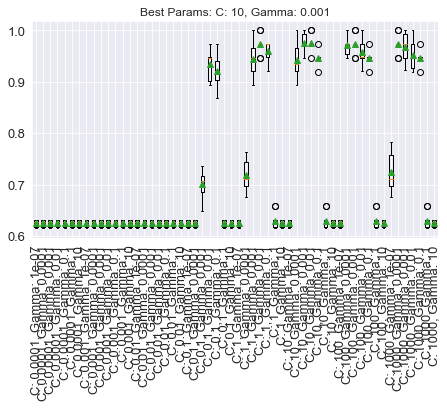

In [16]:
plt.figure(figsize=(12, 4))
# Fijar tamaños personalizados en el canvas
grid = GridSpec(1, 2, width_ratios=[2,1])
# con el primer espacio del canvas
plt.subplot(grid[0])
# generar diagramas de caja para cada validación cruzada
# y solicitar la media
plt.boxplot(empty_dict.values(), showmeans=True);
plt.xticks(range(1, len(empty_dict.keys()) + 1), empty_dict.keys(), rotation=90);
plt.title("Best Params: {}".format(best_params));

In [17]:
# Con GridSearchCV
params = [{'kernel': ['linear', 'rbf', 'poly'],
           'C': c_param_range,
           'gamma': gamma_param_range
           }]
svc_grid = GridSearchCV(SVC(probability=True), params, cv=10)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
# Mejor combinación de Hiperparámetros:
svc_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [19]:
# Mejor desempeño promedio del modelo testing
svc_acc = round(svc_grid.best_score_,5)
svc_acc

0.97638

Text(0.5, 1, 'Accuracy Heatmap - Linear')

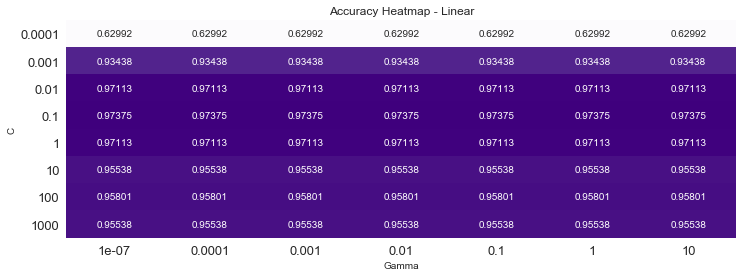

In [20]:
df_results = pd.DataFrame(svc_grid.cv_results_)

# Reporte métricas con kernel='linear'
df_results_linear = df_results[df_results['param_kernel'] == 'linear'][[
    'param_C', 'param_gamma', 'mean_test_score']].reset_index(drop=True)


# display(df_results_linear)
scores_matrix_linear = np.array(
    df_results_linear['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_linear, annot=True, cmap='Purples', cbar=False,
            xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap - Linear')

Text(0.5, 1, 'Accuracy Heatmap - Rbf')

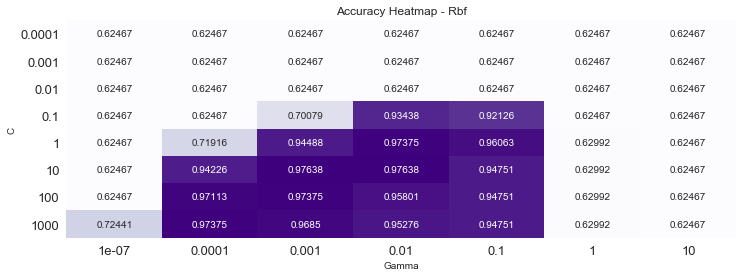

In [21]:
# Reporte métricas con kernel='rbf'
df_results_rbf = df_results[df_results['param_kernel'] == 'rbf'][[
    'param_C', 'param_gamma', 'mean_test_score']].reset_index(drop=True)

# display(df_results_rbf)
scores_matrix_rbf = np.array(df_results_rbf['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_rbf, annot=True, cmap='Purples', cbar=False,
            xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap - Rbf')

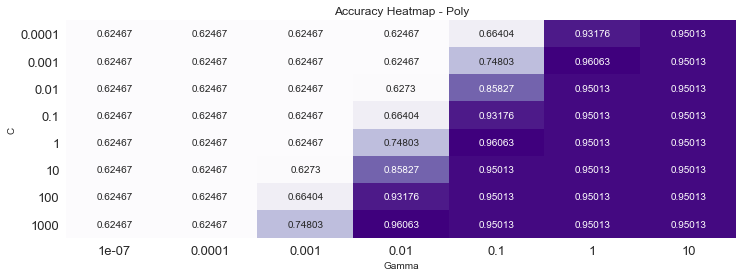

In [22]:
# Reporte métricas con kernel='poly'
df_results_poly = df_results[df_results['param_kernel'] == 'poly'][['param_C','param_gamma','mean_test_score']].reset_index(drop=True)

#display(df_results_poly)
scores_matrix_poly = np.array(df_results_poly['mean_test_score']).reshape(8, 7)

plt.figure(figsize=(12, 4))
sns.heatmap(scores_matrix_poly, annot=True, cmap='Purples', cbar=False, xticklabels=gamma_param_range, yticklabels=c_param_range, fmt=".5")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap - Poly');

### Comentarios:

Los mejores puntajes segun kernel son los siguientes:
- El mejor puntaje con kernel linear es 0.97375 y se da para C=0.1 y Gamma=0.0001.
- El mejor puntaje con kernel rbf es 0.97638 y se da para C=10 y Gamma=0.001.
- El mejor puntaje con kernel poly es 0.96063 y se da para C=0.001 y Gamma=1.

La mejor combinación es {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

## Ejercicio 5: Validación del modelo en el hold-out sample
- Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
- Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. 
- Comente en qué casos el modelo presenta un desempeño deficiente.

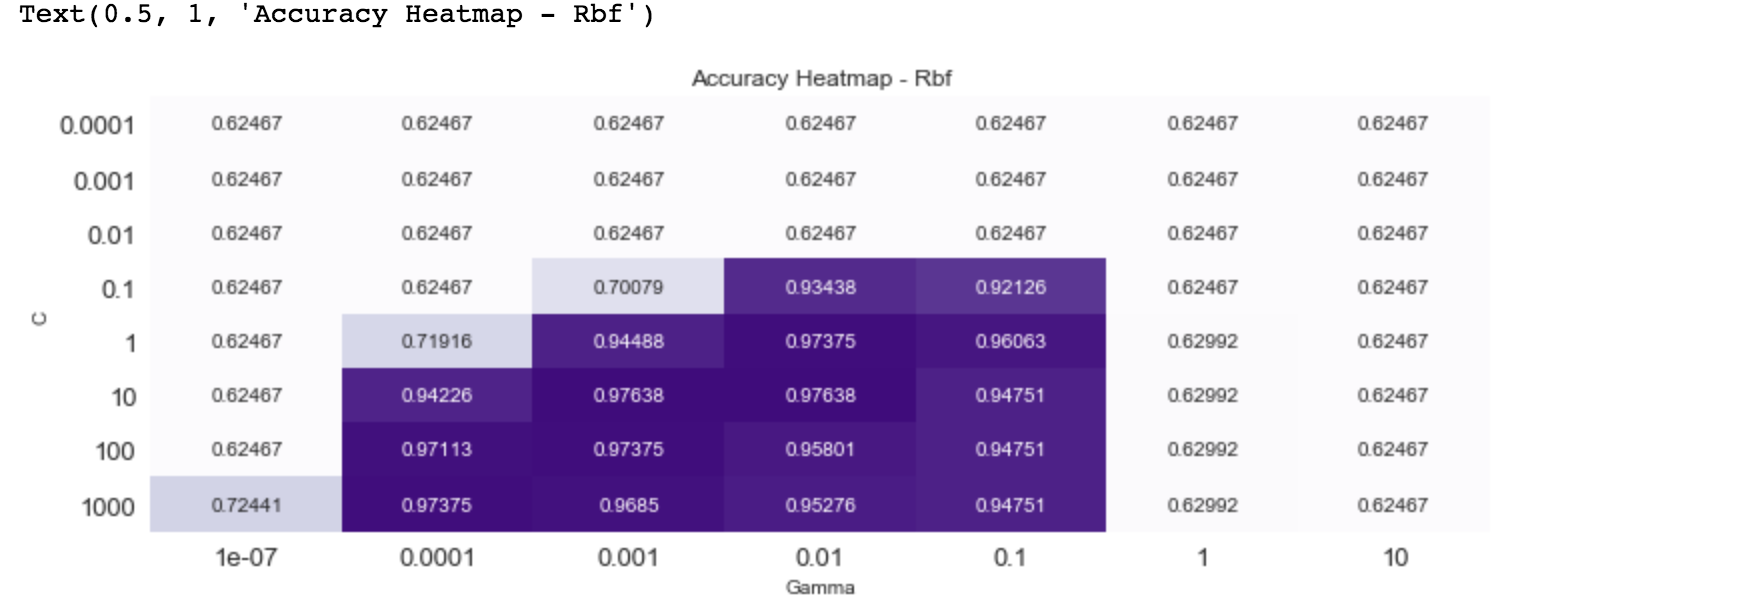

In [23]:
#mejor parametro según GridsearchCV
sample_rbf = Pipeline([
                ('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=10, gamma=0.001))
                ])
sample_rbf.fit(X_train, y_train)
yhat = sample_rbf.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.98      0.94      0.96        69

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [24]:
sample_rbf_1 = Pipeline([
                ('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=10, gamma=0.01))
                ])
sample_rbf_1.fit(X_train, y_train)
yhat_1 = sample_rbf_1.predict(X_test)
print(classification_report(y_test, yhat_1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       119
           1       0.99      0.97      0.98        69

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [25]:
sample_rbf_2 = Pipeline([
                ('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=1, gamma=0.01))
                ])
sample_rbf_2.fit(X_train, y_train)
yhat_2 = sample_rbf_2.predict(X_test)
print(classification_report(y_test, yhat_2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       0.97      0.93      0.95        69

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### Comentarios:
- La combinación de Costo=10 y Gamma=0.01 presenta las mejores métricas con un accuracy score de 99%, a pesar de que por GridSearchCV nos recomendó como hiperparametos el Costo=10 y Gamma=0.001.

## Ejercicio (opcional): Depuración de atributos
- Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
- Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [26]:
# Atributos con overlap menor a .45
df_final_45 = df_final[df_final['overlap_perc']<.45]
df_final_45

overlap_perc
symmetry_worst            0.436975
texture_mean              0.389356
texture_worst             0.380952
compactness_mean          0.316527
compactness_worst         0.316527
perimeter_se              0.280112
radius_se                 0.277311
concavity_worst           0.212885
area_se                   0.207283
radius_mean               0.184874
concavity_mean            0.182073
area_mean                 0.179272
perimeter_mean            0.168067
concave points_worst      0.140056
concave points_mean       0.137255
radius_worst              0.134454
perimeter_worst           0.128852
area_worst                0.128852

In [27]:
# Escalado y división de conjuntos de Train y Test

X_scaled_45 = StandardScaler().fit_transform(df[list(df_final_45.index)])
X_train_45, X_test_45, y_train_45, y_test_45 = train_test_split(
                        X_scaled_45, df['diagnosis'], 
                        random_state=93177, 
                        test_size=.33)

In [28]:
# Con GridSearchCV

svc_grid_45 = GridSearchCV(SVC(probability=True), params, cv=10)
svc_grid_45.fit(X_train_45, y_train_45)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Mejor combinación de Hiperparámetros:
svc_grid_45.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [30]:
# Mejor desempeño promedio del modelo testing:
svc_acc_45 = round(svc_grid_45.best_score_,5)
svc_acc_45

0.97638

In [31]:
sample_rbf_45 = Pipeline([
                ('scaler', StandardScaler()),
                ('svc', SVC(kernel='rbf', C=1000, gamma=0.01))
                ])
sample_rbf_45.fit(X_train_45, y_train_45)
yhat_45 = sample_rbf_45.predict(X_test_45)
print(classification_report(y_test_45, yhat_45))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       119
           1       0.94      0.96      0.95        69

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



### Comentarios: 

- Despues de entrenar el modelo con los nuevos hiperparametros, resulta que el modelo con mejor desempeño sigue siendo el kernel RBF con los datos saturados. En el classification report resulta que con la depuración de de atributos, baja el F1 score y la precisión del modelo. 